# Two-dimensional Ising model

## Finite size scaling

In [12]:
import os
import subprocess
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt

plt.style.use("bodo")

In [48]:
NUM_TOTAL_STEPS = 500000
NUM_BURNIN_STEPS = 400000

if not os.path.exists("../data"):
    os.makedirs("../data")

L = 2**np.arange(3, 7)
T = np.arange(1.5, 3.52, 0.02)

def filename(l, t):
  return f"../data/lattice_{l:.0f}x{l:.0f}_temperature{t:.2f}.csv"
    
for l in L:
    for t in T:
        with open(filename(l, t), "w") as file:
            subprocess.call([
              "../target/debug/ising",
              f"--size={l}",
              f"--temperature={t}",
              f"--total-steps={NUM_TOTAL_STEPS}",
              f"--burnin-steps={NUM_BURNIN_STEPS}"
            ], stdout=file)
        
    print(f"completed simulation of {l:.0f}x{l:.0f} lattice")

completed simulation of 8x8 lattice
completed simulation of 16x16 lattice
completed simulation of 32x32 lattice
completed simulation of 64x64 lattice


In [49]:
data = {l: {t: pd.read_csv(f"../data/{filename(l, t)}") for t in T} for l in L}

In [62]:
suscep = {l: [df["susceptibility"].mean() for df in dfs.values()] for (l, dfs) in data.items()}
absmag = {l: [df["absolute magnetisation"].mean() for df in dfs.values()] for (l, dfs) in data.items()}
mag = {l: [df["magnetisation"].mean() for df in dfs.values()] for (l, dfs) in data.items()}

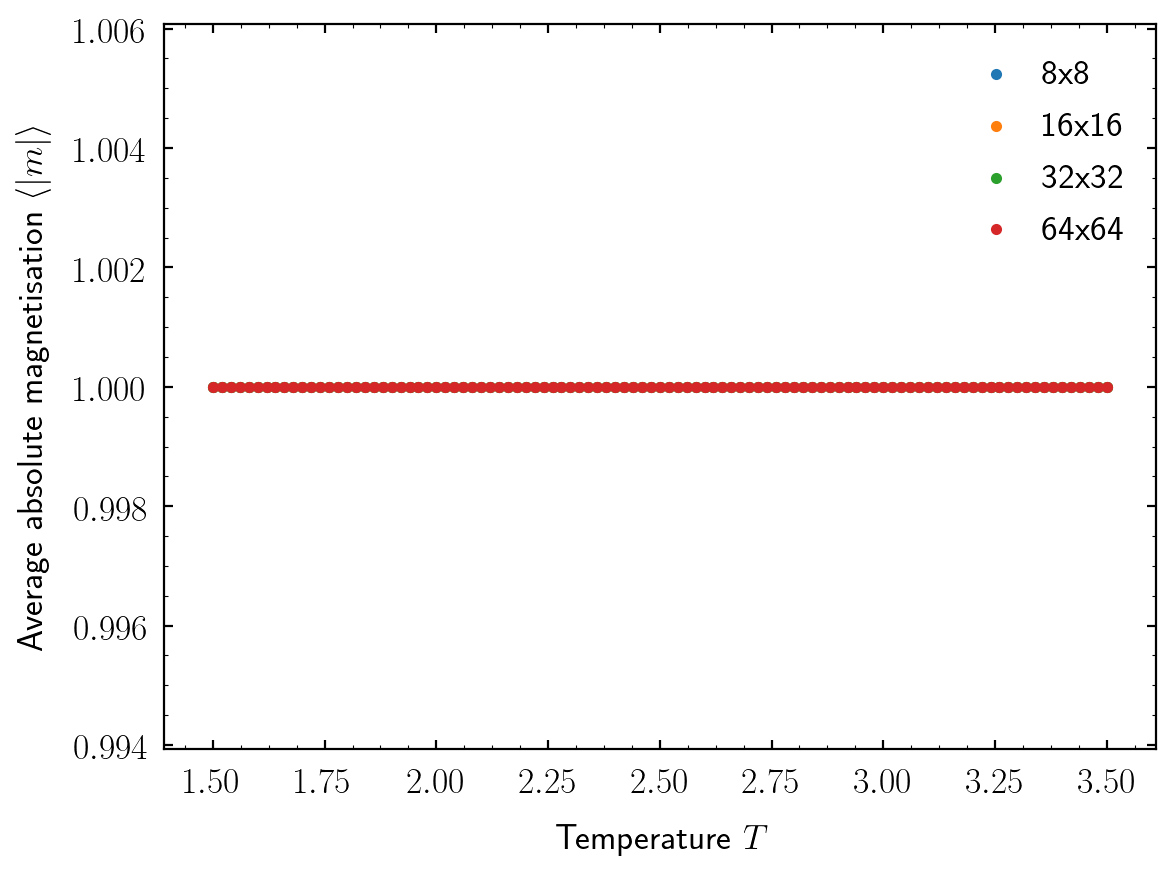

In [64]:
fig, axis = plt.subplots(figsize=(8, 6))

axis.set_xlabel(r"Temperature $T$")
axis.set_ylabel(r"Average absolute magnetisation $\langle\vert m\vert\rangle$")

for (l, m) in absmag.items():
    axis.scatter(T, m, label=f"{l}x{l}")
    
plt.legend()
plt.show()

We obtain an average absolute magnetisation equal to $1$ which is not very surprising as the spins can only take on values $\pm1$, thus,
$$
\langle\sigma\rangle=\frac{1}{N}\sum_i\vert\sigma_i\vert=\frac{1}{N}\sum_i\vert\pm1\vert=\frac{1}{N}\sum_i1=1,
$$
wherein $N$ denotes the total number of spins.

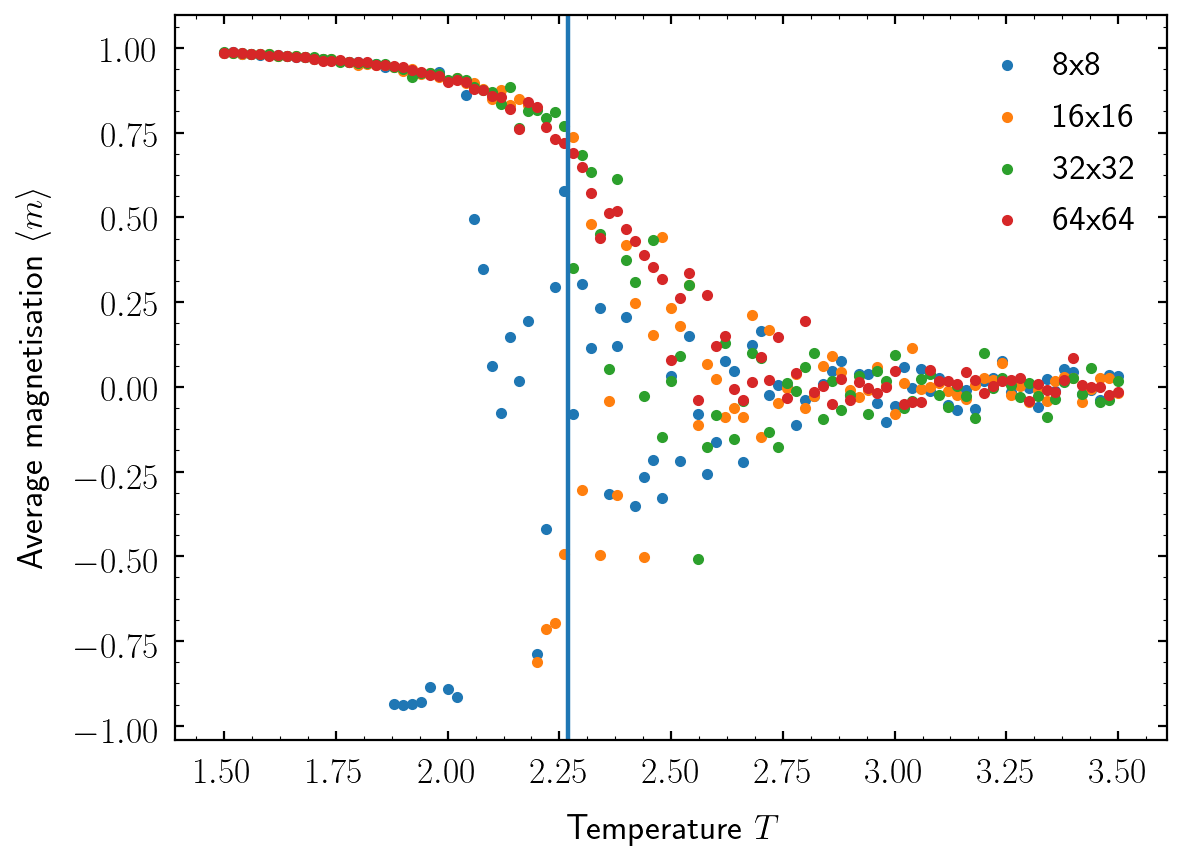

In [69]:
fig, axis = plt.subplots(figsize=(8, 6))

axis.set_xlabel(r"Temperature $T$")
axis.set_ylabel(r"Average magnetisation $\langle m\rangle$")

for (l, m) in mag.items():
    axis.scatter(T, m / l**2, label=f"{l}x{l}")

axis.axvline(2.27, -1, +1)

plt.legend()
plt.show()

Inspecting the average magnetisation for various system sizes and temperatures, we observe a phase transition from an ordered $\langle m\rangle=\pm1$ to an unordered $\langle m\rangle=0$ state at the critical temperature $T_c\approx2.27$.

In addition to the phase transition, we note a reduction in variance with increase of the lattice size.

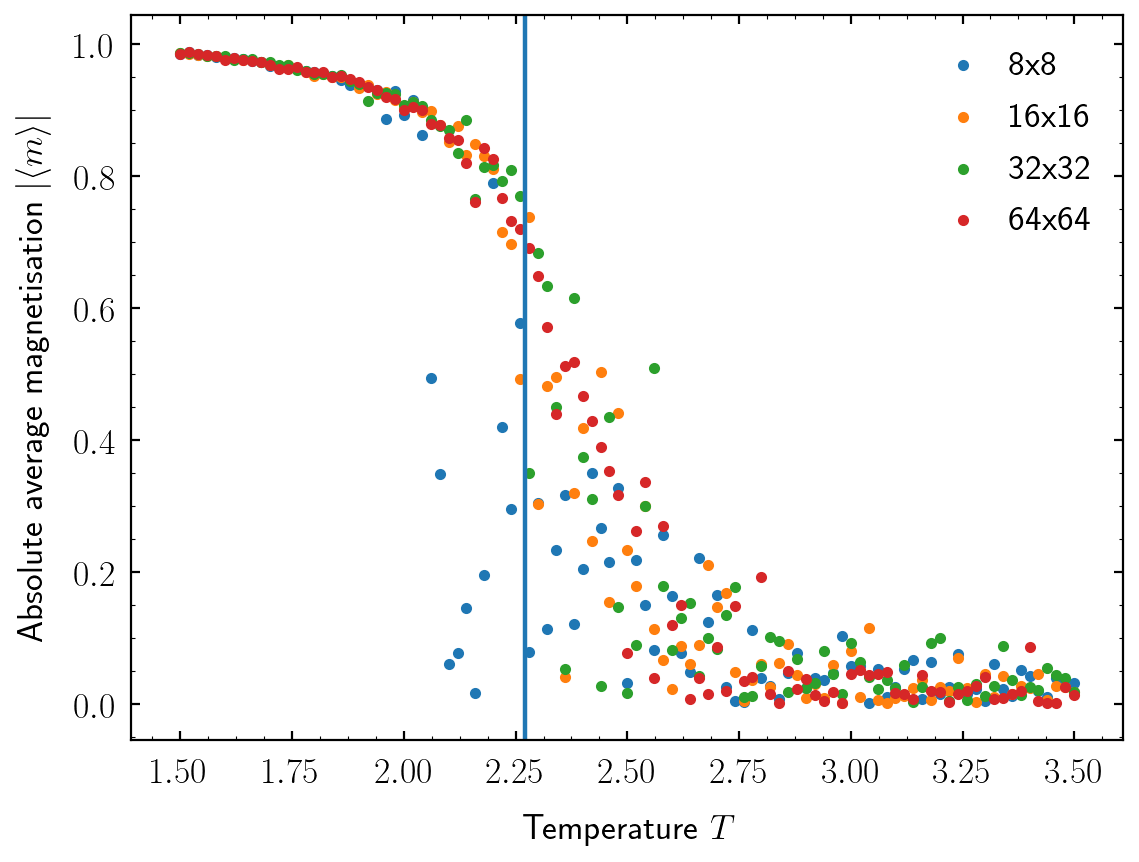

In [72]:
fig, axis = plt.subplots(figsize=(8, 6))

axis.set_xlabel(r"Temperature $T$")
axis.set_ylabel(r"Absolute average magnetisation $\vert\langle m\rangle\vert$")

for (l, m) in mag.items():
    axis.scatter(T, np.abs(m) / l**2, label=f"{l}x{l}")

axis.axvline(2.27, 0, +1)

plt.legend()
plt.show()

Here we show the absolute average magnetisation which accounts for the order present but does not distinguish between different types of order.

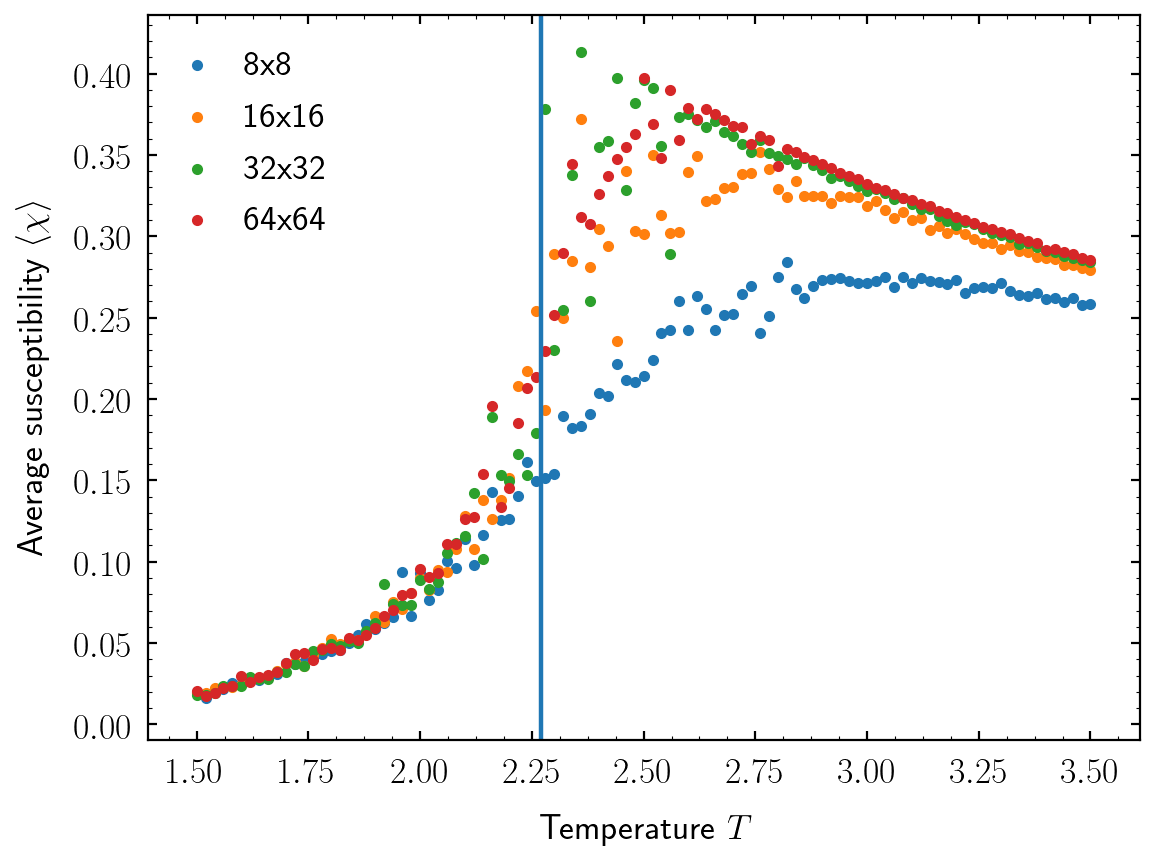

In [70]:
fig, axis = plt.subplots(figsize=(8, 6))

axis.set_xlabel(r"Temperature $T$")
axis.set_ylabel(r"Average susceptibility $\langle\chi\rangle$")

for (l, chi) in suscep.items():
    axis.scatter(T, chi, label=f"{l}x{l}")
    
axis.axvline(2.27, -1, +1)
    
plt.legend()
plt.show()

In the above plot we can see how the average susceptibility $\langle\chi\rangle$ increases fast near the critical temperature (blue line) and then slighlty decreases thereafter.

We also observe that the susceptibility near the critical temperature increases more the larger the system size.

Actually, we would expect the susceptibility to peak exactly at the critical temperature $T_c\approx2.26$ (blue line), yet it appears that the peak is closer to $T\approx2.5$.

We don't know how to read this result.